In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [16]:
import os
os.chdir('../code/')

## Lattices

A lattice in the plane is something that looks like:

In [8]:
vec1 = 2*np.random.rand(2)-1
vec2 = 2*np.random.rand(2)-1

In [11]:
[vec1,vec2]

[array([ 0.76875268, -0.52635735]), array([-0.18720919, -0.84636717])]

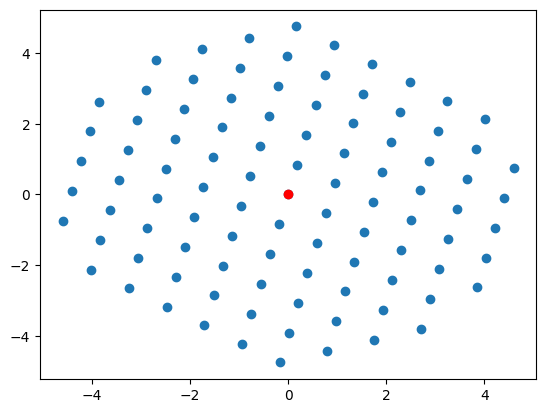

In [13]:
pts = np.array([a*vec1+b*vec2 for a in range(-5,6) for b in range(-5,6)
                if np.linalg.norm(a*vec1+b*vec2)<5])
plt.scatter(x=pts[::,0],y=pts[::,1])
plt.scatter(x = [0], y = [0], c= 'r')

We can give a more precise definition by explaining the code we used to generate this picture:
* A lattice (in the plane) is a collection of points.
* The points of a lattice can be obtained from a basis of $\mathbb{R}^2$ the same way we would obtain general points (as linear combinations), but we restrict to INTEGER coefficients, not real numbers. This leads to the discreteness in the picture.

We chose to only display points of radius $r<5$ for purely aesthetic reasons - every point $a v_1 + bv_2$ with integer coefficients is actually part of the lattice, but the picture we obtain might look odd if we don't restrict to a disk.

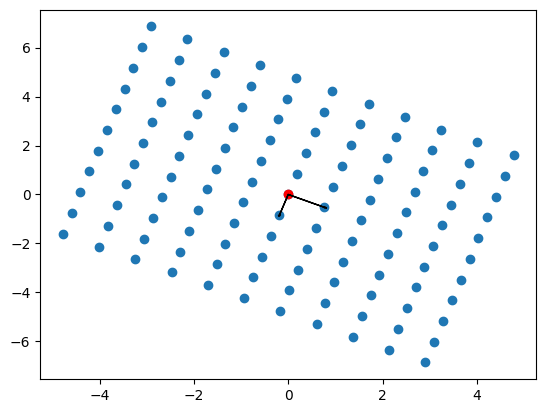

In [14]:
ptsall = np.array([a*vec1+b*vec2 for a in range(-5,6) for b in range(-5,6)
                ])
plt.scatter(x=ptsall[::,0],y=ptsall[::,1])

plt.scatter(x = [0], y = [0], c= 'r')
plt.arrow(x=0,y=0,dx = vec1[0],dy=vec1[1],head_width = 0.04)
plt.arrow(x=0,y=0,dx = vec2[0],dy=vec2[1],head_width = 0.04)


* There are lots of choices of basis for any given lattice, so we don't want a picture that depends on our choice of basis.
* We also do not really care if the picture is rescaled or rotated.

Both issues are easier to deal with if we think of points on the plane as representing complex numbers: $(x,y)$ represents $x+iy$. One advantage of doing this is we can easily check whether a basis $z_1, z_2$ can be transformed into a different basis $w_1, w_2$ by rotating/scaling: rotating by $\theta$ and rescaling by $r$ is the same as multiplying by the complex number $r\cos \theta + ir\sin \theta$. This means $z_1,z_2$ can be rotated/scaled to $w_1, w_2$ if and only if $\frac{w_1}{z_1} = \frac{w_2}{z_2}$: if the two fractions are equal, then rotating $z_1,z_2$ by the angle of that complex number and rescaling by the norm of that complex number gives us $w_1, w_2$.

In particular, we can always replace our original basis $z_1, z_2$ by $1, \tau = \frac{z_1}{z_2}$ to obtain a lattice with the same geometry, but that requires one less vector in the description. 

Now, we can just as easily do $\frac{z_2}{z_1}$; the convention is to choose whichever of $\frac{z_2}{z_1}, \frac{z_1}{z_2}$ has positive imaginary part, since exactly one of those fractions lies in the upper half plane and the other lies on the lower half plane.

Thus, up to rotating/rescaling, every lattice can be described by specifying a point on the upper half plane.


In [ ]:
## Make rotation picture

Even with this restriction, there are still too many choices for $\tau$.

For example, the lattices generated by $1, \tau$ and $1, \tau + 1$ are always going to be the same. 

However, for each lattice, there is a unique $\tau$ in the following region:

Starting from a lattice, find a vector of minimal length.
This will be our first basis vector, and we will rotate the lattice so that the first basis vector is at $1$ (i.e. $(1,0)$ in the plane.)

Now choose any other vector so that we have a lattice $1, \tau$.
If the real part of $\tau$ is not between $-1/2, 1/2$, we can add/subtract 1 until it lies in that range. 

One can show that this $\tau$ is uniquely determined by the geometry of the lattice.

## Symmetries of lattices

Let $\Lambda$ be a lattice in the complex numbers, and let $\alpha$ be a complex number.

We write $\alpha \cdot \Lambda$ to denote the set of points obtained by multiplying everything in $\Lambda$ by $\alpha$. Note that this is also a lattice (if $\Lambda$ is generated by $z_1,z_2$, then $\alpha \Lambda$ is generated by $\alpha z_1, \alpha z_2$).

We say that $\alpha$ is a symmetry of $\Lambda$ if every point of $\alpha \Lambda$ is contained in $\Lambda$.

* Every lattice has infinitely many boring symmetries: if we multiply a lattice by an integer, we always land back in the lattice.

* For almost all lattices, there are only boring symmetries.

* For special lattices, like the lattice generated by $1, i$, we have extra symmetries - e.g. $\alpha = i$.

In [ ]:
## Lattice symmetries

The set of symmetries of a lattice "wants" to have a lot of structure:
* The set of symmetries only depends on the internal geometry of the lattice - if we pick a different basis, or rotate or rescale the lattice, the symmetries don't change.
* The symmetries of a lattice form a lattice themselves, albeit with a caveat - the lattice might be 1-dimensional.
* If our lattice is normalized so that one of the basis vectors is 1, then the symmetries of the lattice necessarily form a sublattice of the original lattice.
* The symmetries of the lattice form a ring: this means we can always multiply them. If $\alpha_1 , \alpha_2$ are symmetries and $\lambda$ is a lattice point, then $\alpha_2 \lambda$ is in the lattice because $\alpha_2$ is a symmetry, so $\alpha_1 \alpha_2 \lambda$ is in the lattice because $\alpha_1$ is a symmetry and $\alpha_2 \lambda$ is in the lattice, so $(\alpha_1\alpha_2)\lambda$ is always in the lattice. Thus, $\alpha_1\alpha_2$ is in the lattice of symmetries.

The set of symmetries of a lattice is basically the biggest ring that we can fit in the lattice. In most cases, we can only fit a copy of the integers - but in special cases, we can fit a copy of a ring of the form $\mathbb{Z}[\sqrt{-d}]$ or $\mathbb{Z}[\frac{1+\sqrt{-d}}{2}]$ (the latter only if $-d \equiv 1 \pmod 4$) in our lattice.

In [15]:
## Visualize -23 ring in -23 CM lattice

## Lattices with a given set of symmetries

Let $\Lambda$ be a lattice.
The set of symmetries of $\Lambda$ is either $\mathbb{Z}$,
or it coincides with the lattice generated by $1, \tau$,
where $\tau$ has one of the following forms:
* $\tau = \sqrt{-d}$ for some integer $-d<0$.
* $\tau = \frac{-1+\sqrt{-d}}{2}$ for an odd integer $-d <0$ which satisfies $-d \equiv 1 \pmod 4$ (e.g. $\frac{-1+\sqrt{-3}}{2}$)
For any such $\tau$, there are only finitely many lattices (up to rotation/rescaling) whose symmetry group contains the lattice generated by $1,\tau$.

We can obtain them all using classical tools from lattice theory.

The function below takes as input a discriminant, and returns a list of $\tau$'s that represent every lattice whose symmetry group contains the lattice associated to the discriminant.



In [17]:
from lattices import *

In [46]:
discriminants = [d for d in range(-3,-25,-1) if d % 4 <= 1]
tau_arrays = [np.array([np.array([z.real,z.imag]) for z in get_taus(d)]) for d in discriminants]
tau_0s = []
for d in discriminants:
    if d % 4 == 1:
        tau_0s.append(np.array([-1,np.sqrt(-d)])/2)
    else:
        tau_0s.append(np.array([0,np.sqrt(-d)]))
        

In [39]:
[max(arr[::,1]) for arr in tau_arrays]

[0.8660254037844385,
 1.0,
 1.3228756555322954,
 1.4142135623730951,
 1.6583123951777,
 1.7320508075688772,
 1.9364916731037083,
 2.0000000000000004,
 2.1794494717703365,
 2.23606797749979,
 2.3979157616563596,
 2.4494897427831783,
 2.5980762113533156,
 2.6457513110645907,
 2.7838821814150108,
 2.8284271247461903]

(0.0, 2.5)

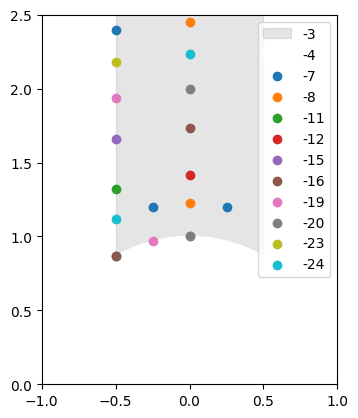

In [48]:
fig,ax = plt.subplots()
circle = mpl.patches.Circle((0,0),radius=1,color='w')
rec = mpl.patches.Rectangle((-0.5,0),1,3,color =[0.5,0.5,0.5,0.2])
ax.add_patch(rec)
ax.add_patch(circle)
for i,d in enumerate(discriminants):
    taud = tau_0s[i]
    tauarrd = tau_arrays[i]
    ax.scatter(x = tauarrd[::,0], y= tauarrd[::,1]
               )
plt.legend(discriminants)
ax.set_aspect('equal')
ax.set_xlim(-1,1)
ax.set_ylim(0,2.5)